In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("books_data.csv")

print("=== RAW DATA LOADED ===")
display(df.head())
print(df.info())

questions = [
    "1. What is the distribution of book prices?",
    "2. Do higher-rated books cost more?",
    "3. Which rating category is most common?",
    "4. Are there outliers in price?",
    "5. Are there missing or duplicate values?",
    "6. How many books are available in stock?",
]

print("\n=== KEY QUESTIONS FOR EDA ===")
for q in questions:
    print(q)


=== RAW DATA LOADED ===


,title,price_gbp,rating,availability,product_page_url
0,A Light in the Attic,Â51.77,3,In stock,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,Â53.74,1,In stock,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,Â50.10,1,In stock,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,Â47.82,4,In stock,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,Â54.23,5,In stock,https://books.toscrape.com/catalogue/sapiens-a...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             40 non-null     object
 1   price_gbp         40 non-null     object
 2   rating            40 non-null     int64 
 3   availability      40 non-null     object
 4   product_page_url  40 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB
None

=== KEY QUESTIONS FOR EDA ===
1. What is the distribution of book prices?
2. Do higher-rated books cost more?
3. Which rating category is most common?
4. Are there outliers in price?
5. Are there missing or duplicate values?
6. How many books are available in stock?


In [3]:
df['price_gbp'] = (
    df['price_gbp']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.extract(r'(\d+\.\d+)', expand=False)
)
df['price_gbp'] = pd.to_numeric(df['price_gbp'], errors='coerce')

# Clean rating column (ensure numeric)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean availability (extract numbers)
df['copies_available'] = (
    df['availability']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
)
df['copies_available'] = pd.to_numeric(df['copies_available'], errors='coerce')

print("\n=== CLEANED DATA PREVIEW ===")
display(df.head())

print("\n=== DATA TYPES AFTER CLEANING ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== DUPLICATES ===")
print("Duplicate rows:", df.duplicated().sum())


print("\n=== SUMMARY STATISTICS ===")
display(df.describe())


=== CLEANED DATA PREVIEW ===


,title,price_gbp,rating,availability,product_page_url,copies_available
0,A Light in the Attic,51.77,3,In stock,https://books.toscrape.com/catalogue/a-light-i...,NaN
1,Tipping the Velvet,53.74,1,In stock,https://books.toscrape.com/catalogue/tipping-t...,NaN
2,Soumission,50.10,1,In stock,https://books.toscrape.com/catalogue/soumissio...,NaN
3,Sharp Objects,47.82,4,In stock,https://books.toscrape.com/catalogue/sharp-obj...,NaN
4,Sapiens: A Brief History of Humankind,54.23,5,In stock,https://books.toscrape.com/catalogue/sapiens-a...,NaN



=== DATA TYPES AFTER CLEANING ===
title                object
price_gbp           float64
rating                int64
availability         object
product_page_url     object
copies_available    float64
dtype: object

=== MISSING VALUES ===
title                0
price_gbp            0
rating               0
availability         0
product_page_url     0
copies_available    40
dtype: int64

=== DUPLICATES ===
Duplicate rows: 0

=== SUMMARY STATISTICS ===


,price_gbp,rating,copies_available
count,40.000000,40.000000,0.0
mean,34.958750,3.050000,NaN
std,14.111908,1.501282,NaN
min,12.840000,1.000000,NaN
25%,22.575000,2.000000,NaN
50%,34.080000,3.000000,NaN
75%,50.407500,4.250000,NaN
max,57.250000,5.000000,NaN


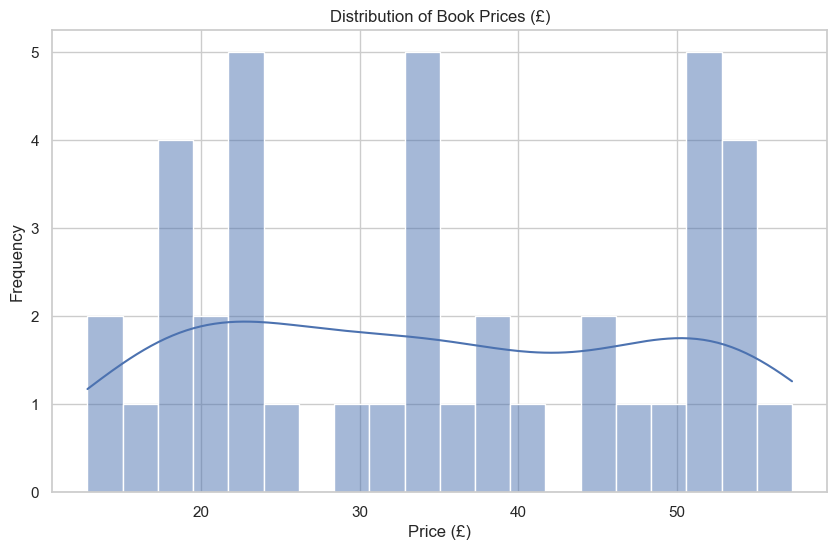

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_gbp'], bins=20, kde=True)
plt.title('Distribution of Book Prices (£)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

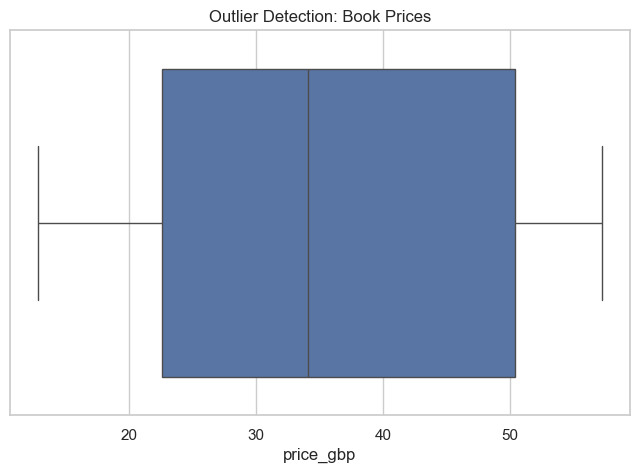

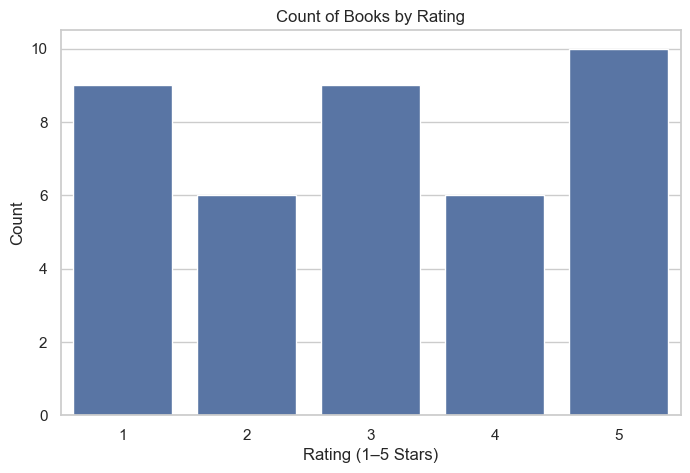

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price_gbp'])
plt.title("Outlier Detection: Book Prices")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x=df['rating'])
plt.title("Count of Books by Rating")
plt.xlabel("Rating (1–5 Stars)")
plt.ylabel("Count")
plt.show()

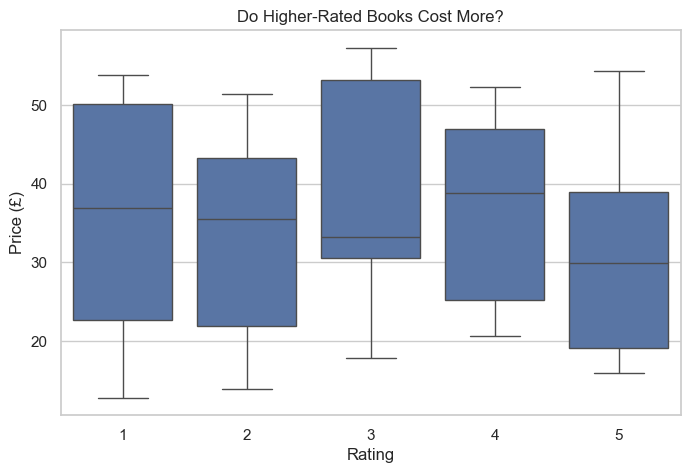

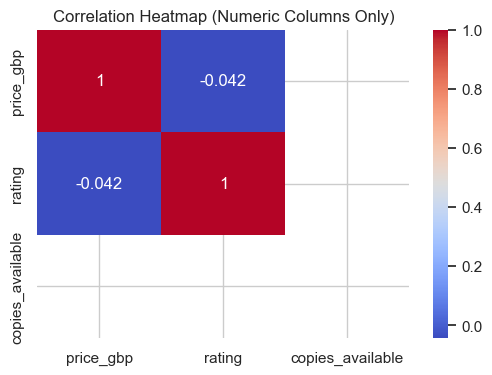

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['rating'], y=df['price_gbp'])
plt.title("Do Higher-Rated Books Cost More?")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [7]:

print("\n=== DATA QUALITY CHECK ===")
print("Negative prices:", (df['price_gbp'] < 0).sum())
print("Ratings outside 1–5:", ((df['rating'] < 1) | (df['rating'] > 5)).sum())
print("Negative stock:", (df['copies_available'] < 0).sum())


df.to_csv("books_data_clean.csv", index=False)
print("\nCleaned dataset saved as: books_data_clean.csv")


print("\n=== EDA COMPLETED SUCCESSFULLY ===")


=== DATA QUALITY CHECK ===
Negative prices: 0
Ratings outside 1–5: 0
Negative stock: 0

Cleaned dataset saved as: books_data_clean.csv

=== EDA COMPLETED SUCCESSFULLY ===
